In [40]:
import importlib
import src.params as params
import src.model as model
import src.main as main
import src.dataloader as dataloader
importlib.reload(dataloader)
import numpy as np

In [2]:
args = params.get_args()
data = main.get_cmdb(args)
dataset = dataloader.MyDataset(args)

Loading preprocessed data from /home/junetheriver/code/aiops/workdir/system_a/data_pre.pkl


In [3]:
smodel = model.Statistic(args, data)

In [25]:
dt = {}
for tr in smodel.time_range:
    if str(tr) not in dt:
        dt[str(tr)] = tr

In [26]:
len(dt)

58

<IntervalArray>
[(2021-03-11 11:49:00, 2021-03-11 11:50:00]]
Length: 1, dtype: interval[datetime64[ns], right]


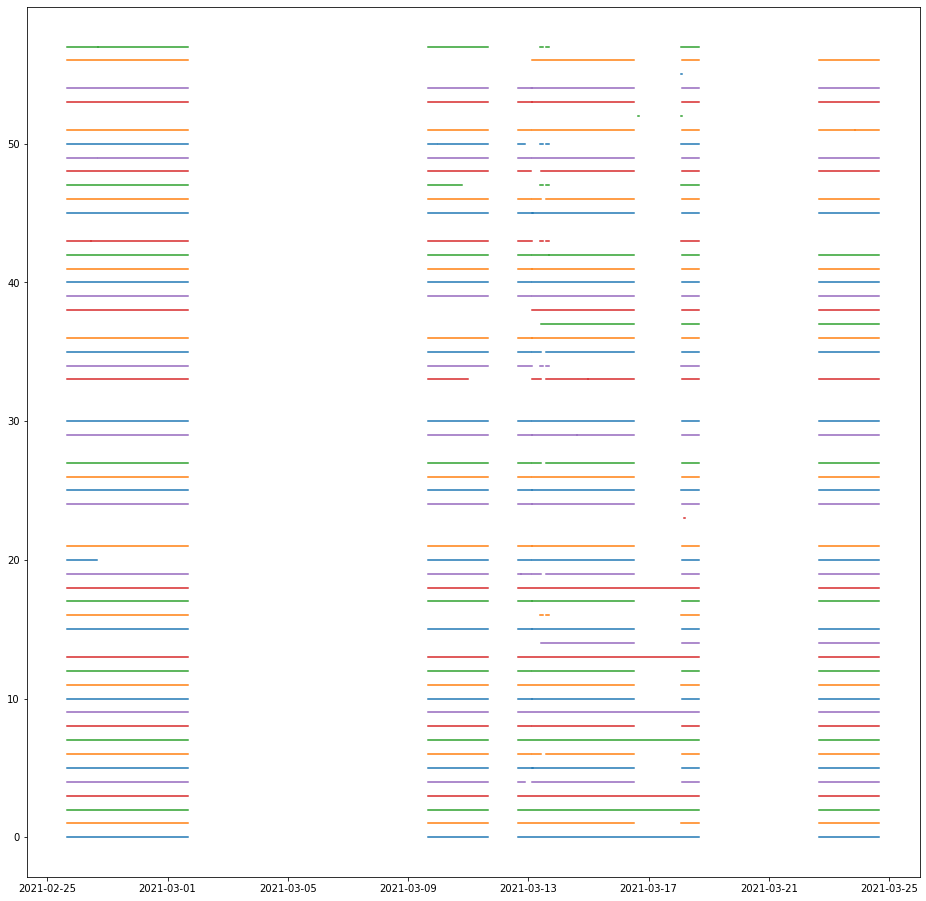

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,16))
for i, tr_array in enumerate(dt.values()):
    if i == 22:
        print(tr_array)
    for interval in tr_array:
        start, end = interval.left, interval.right
        plt.plot([start, end], [i,i], f"C{i % 5}")
plt.savefig("../timerange.jpg")

In [23]:
import os
dataset.dump(os.path.join(args.workdir, "gt_pre.pkl"))

In [86]:
from src.dataloader import MyDataset
importlib.reload(dataloader)

<module 'src.dataloader' from '/home/junetheriver/code/aiops/src/dataloader.py'>

In [38]:
data.head()

,gjjcore8##system.net.tcp.retrans_segs,gjjcore9##system.tcp.retrans_pct,gjjha3##system.run_time,gjjha1##system.io.w_s,gjjbps1##system.load.1,gjjcore7##system.run_time,gjjcore5##system.fs.inodes.free,gjjcore9##system.udp.connect.num,gjjap1##system.io.r_await,gjjbps3##system.load.norm.15,...,gjjcore8##weblogic.can_connect,gjjha2##haproxy.backend.session.rate,gjjuaap3##system.mem.slab,gjjcore2##system.mem.pct_usage,gjjvincio2##system.fs.inodes.free,gjjha3##system.mem.free,gjjcore6##system.tcp.last_ack,gjjcore6##system.tcp.fin_wait1,gjjvincio2##system.mem.used,gjjvincio2##system.load.norm.5
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-02-25 16:00:00,0.0,0.02,2088670.13,0.0,0.17,2089343.13,108047885.0,16.0,0.0,0.02,...,1.0,NaN,400.0,37.75,108086232.5,122.0,0.0,0.0,8068.0,0.02
2021-02-25 16:01:00,0.0,0.02,2088730.25,0.0,0.17,2089403.25,108047885.0,16.0,0.5,0.02,...,1.0,NaN,400.0,36.90,108086232.5,119.0,0.0,0.0,8066.0,0.01
2021-02-25 16:02:00,0.0,0.02,2088790.50,0.0,0.06,2089463.38,108047885.0,16.0,0.5,0.02,...,1.0,NaN,400.0,36.00,108086232.5,120.0,0.0,0.0,8067.0,0.01
2021-02-25 16:03:00,0.0,0.02,2088850.63,0.0,0.02,2089523.50,108047885.0,16.0,0.0,0.01,...,1.0,NaN,400.0,39.62,108086232.5,121.0,0.0,0.0,8066.0,0.01
2021-02-25 16:04:00,0.0,0.02,2088910.75,0.0,0.04,2089583.63,108047885.0,16.0,0.0,0.01,...,1.0,1.0,400.0,39.63,108086232.5,128.0,0.0,0.0,8067.0,0.01


In [53]:
temp = data[np.isnan(data["gjjcore8##system.net.tcp.retrans_segs"])]

In [64]:
indexes = data.index

In [78]:
(indexes[-1].timestamp() - indexes[0].timestamp())/60

38879.0

In [85]:
new_index = [int((index.timestamp() - 1614268800) / 60) for index in indexes]
new_index[-1]

38879

In [88]:
data.index = new_index
data.head()

,gjjcore8##system.net.tcp.retrans_segs,gjjcore9##system.tcp.retrans_pct,gjjha3##system.run_time,gjjha1##system.io.w_s,gjjbps1##system.load.1,gjjcore7##system.run_time,gjjcore5##system.fs.inodes.free,gjjcore9##system.udp.connect.num,gjjap1##system.io.r_await,gjjbps3##system.load.norm.15,gjjap02##system.os.nofile.current,gjjredis1##system.load.norm.5,gjjcoreap02##system.tcp.last_ack,gjjcore3##system.load.norm.5,gjjha3##haproxy.frontend.errors.req_rate,gjjcoreap03##system.net.packets_out.count,gjjbps1##weblogic.basic.active.sockets.connections,gjjbps2##system.tcp.last_ack,gjjha3##system.net.packets_in.count,gjjcore2##system.mem.used,gjjcore6##weblogic.webapp.sessions,gjjap2##system.mem.real.pct_useage,gjjcore4##system.mem.buffered,gjjbps2##system.fs.inodes.in_use,gjjvincio3##system.tcp.syn_sent,gjjbps3##system.mem.buffered,gjjap3##system.io.wkb_s,gjjha1##system.fs.inodes.used,gjjap2##system.cpu.pct_usage,gjjcore7##system.tcp.syn_recv,gjjap2##system.io.r_s,gjjha2##system.tcp.retrans_pct,gjjcoreap02##system.net.packets_out.count,gjjcoreap02##system.io.wkb_s,gjjuaap2##system.net.udp.in_datagrams,gjjcoreap04##system.mem.pct_usage,gjjcore5##system.io.rrqm_s,gjjcore9##system.load.15,gjjbps1##system.run_time,gjjcore2##system.io.rkb_s,gjjap3##system.load.5,gjjha3##system.load.1.pct,gjjredis1##system.io.svctm,gjjweb001##system.mem.free,gjjcoreap02##system.tcp.fin_wait1,gjjcoreap03##system.mem.slab,gjjap02##system.io.await,gjjcore8##system.cpu.iowait,gjjredis2##system.tcp.syn_sent,gjjap2##system.disk.used,gjjvincio2##system.io.avg_rq_sz,gjjbps3##system.tcp.established,gjjweb001##system.io.w_await,gjjweb003##system.cpu.pct_usage,gjjcoreap03##system.io.r_await,gjjuaap1##system.cpu.iowait,gjjweb001##system.mem.slab,gjjuaap1##system.io.wrqm_s,gjjha1##system.net.bytes_sent,gjjcore9##system.io.w_s,gjjcore6##system.udp.connect.num,gjjcore1##weblogic.servlet.execute.time_avg,gjjuaap2##system.tcp.fin_wait1,gjjha1##system.net.tcp.out_segs,gjjvincio2##system.load.norm.15,gjjcoreap03##system.net.udp.in_datagrams,gjjcore2##system.io.w_s,gjjcore7##system.net.tcp.retrans_segs,gjjcore3##system.mem.buffered,gjjredis1##system.tcp.listen,gjjap2##system.load.1,gjjvincio3##system.tcp.syn_recv,gjjbps1##system.io.r_s,gjjbps3##system.net.tcp.in_segs,gjjha2##system.fs.inodes.free,gjjha3##system.tcp.fin_wait2,gjjbps2##system.tcp.close_wait,gjjcoreap03##system.tcp.retrans_pct,gjjcore2##system.net.udp.in_datagrams,gjjweb002##system.load.5,gjjcore1##system.load.1.pct,gjjcoreap03##system.cpu.user,gjjcore6##system.io.avg_rq_sz,gjjha3##haproxy.frontend.session.rate,gjjbps1##system.tcp.fin_wait2,gjjuaap3##system.net.bytes_sent,gjjuaap1##system.io.w_await,gjjcore5##weblogic.webapp.sessions,gjjcore6##system.fs.inodes.in_use,gjjap03##system.tcp.established,gjjweb001##system.net.udp.out_datagrams,gjjcore1##system.cpu.user,gjjcore4##system.tcp.fin_wait2,gjjvincio3##system.tcp.time_wait,gjjvincio2##system.tcp.fin_wait1,gjjcore3##system.tcp.established,gjjha1##system.cpu.i_dle,gjjcore6##system.load.norm.15,gjjap2##system.tcp.close_wait,gjjcore5##weblogic.basic.active.sockets.connections,gjjvincio1##system.os.nofile.current,gjjvincio1##system.tcp.syn_recv,gjjcoreap04##system.load.norm.15,gjjcore5##system.cpu.iowait,gjjap1##system.io.svctm,gjjbps3##system.disk.pct_usage,gjjha2##system.net.tcp.retrans_segs,gjjvincio2##system.cpu.iowait,gjjcore8##system.cpu.i_dle,gjjvincio3##system.io.wrqm_s,gjjredis1##system.io.r_s,gjjcore2##system.disk.used,gjjha3##haproxy.frontend.bytes.in_rate,gjjap03##system.tcp.syn_sent,gjjuaap2##system.mem.usable,gjjha2##haproxy.frontend.response.2xx,gjjbps2##system.net.udp.in_datagrams,gjjap03##system.cpu.pct_usage,gjjap3##system.disk.free,gjjbps3##system.tcp.retrans_pct,gjjuaap2##system.mem.slab,gjjcore7##system.net.packets_in.count,gjjap2##system.net.packets_in.count,gjjcoreap03##system.tcp.close_wait,gjjbps1##system.net.tcp.in_segs,gjjuaap3##system.mem.cached,gjjvincio1##system.tcp.established,gjjcore9##weblogic.webapp.current.sessions,gjjvincio3##system.

In [99]:
import torch
from torch.nn.functional import interpolate

In [92]:
a = torch.tensor(data.values)

In [8]:
from pandas import DataFrame
import torch
import pandas as pd

In [101]:
b = torch.nan_to_num(a)
b.shape

torch.Size([38880, 2152])

In [110]:
torch.std_mean(b, dim=0)[1].shape

torch.Size([2152])

In [120]:
torch.median(b, dim=0)[0].shape

torch.Size([2152])

In [115]:
torch.mode(b, dim=0)[0]

tensor([0., 0., 0.,  ..., 0., 0., 0.], dtype=torch.float64)

In [122]:
c = torch.stack([torch.median(b, dim=0)[0], torch.mode(b, dim=0)[0]])
c.shape

torch.Size([2, 2152])

In [124]:
import torch.nn as nn
m = nn.Conv1d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 50)
output = m(input)
print(output.shape)

torch.Size([20, 33, 24])


In [10]:
data_l = list(data.values())

In [11]:
c = pd.concat(data_l, axis=1)

In [14]:
c.columns

Index(['('gjjcore8', 'system.net.tcp.retrans_segs')',
       '('gjjcore9', 'system.tcp.retrans_pct')',
       '('gjjha3', 'system.run_time')', '('gjjha1', 'system.io.w_s')',
       '('gjjbps1', 'system.load.1')', '('gjjcore7', 'system.run_time')',
       '('gjjcore5', 'system.fs.inodes.free')',
       '('gjjcore9', 'system.udp.connect.num')',
       '('gjjap1', 'system.io.r_await')', '('gjjbps3', 'system.load.norm.15')',
       ...
       '('gjjcore8', 'weblogic.can_connect')',
       '('gjjha2', 'haproxy.backend.session.rate')',
       '('gjjuaap3', 'system.mem.slab')',
       '('gjjcore2', 'system.mem.pct_usage')',
       '('gjjvincio2', 'system.fs.inodes.free')',
       '('gjjha3', 'system.mem.free')', '('gjjcore6', 'system.tcp.last_ack')',
       '('gjjcore6', 'system.tcp.fin_wait1')',
       '('gjjvincio2', 'system.mem.used')',
       '('gjjvincio2', 'system.load.norm.5')'],
      dtype='object', length=2152)

In [17]:
for col in c.columns:
    print(type(col))
    # print(c.get(col).head(1))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [19]:
data_l[0].head()

,"('gjjcore8', 'system.net.tcp.retrans_segs')"
timestamp,
2021-02-25 16:00:00,0.0
2021-02-25 16:01:00,0.0
2021-02-25 16:02:00,0.0
2021-02-25 16:03:00,0.0
2021-02-25 16:04:00,0.0


In [22]:
data_l[0].values.squeeze()

array([0., 0., 0., ..., 0., 0., 0.])

In [39]:
dataset = MyDataset(args)

In [40]:
from src.dataloader import MyDataset

In [41]:
dataset = [d[1].round("min") for d,l in dataset]

In [42]:
dataset

[Timestamp('2021-02-26 03:33:00'),
 Timestamp('2021-02-26 03:55:00'),
 Timestamp('2021-02-26 04:04:00'),
 Timestamp('2021-02-26 04:29:00'),
 Timestamp('2021-02-26 04:45:00'),
 Timestamp('2021-02-26 04:52:00'),
 Timestamp('2021-02-26 05:09:00'),
 Timestamp('2021-02-26 05:16:00'),
 Timestamp('2021-02-26 05:25:00'),
 Timestamp('2021-02-26 05:40:00'),
 Timestamp('2021-02-26 05:58:00'),
 Timestamp('2021-02-26 06:06:00'),
 Timestamp('2021-02-26 06:22:00'),
 Timestamp('2021-02-26 06:29:00'),
 Timestamp('2021-02-26 06:50:00'),
 Timestamp('2021-02-26 07:04:00'),
 Timestamp('2021-02-26 07:19:00'),
 Timestamp('2021-02-26 07:31:00'),
 Timestamp('2021-02-26 07:49:00'),
 Timestamp('2021-02-26 07:55:00'),
 Timestamp('2021-02-26 08:10:00'),
 Timestamp('2021-02-26 08:31:00'),
 Timestamp('2021-02-26 08:48:00'),
 Timestamp('2021-02-26 08:59:00'),
 Timestamp('2021-02-26 09:05:00'),
 Timestamp('2021-02-26 09:29:00'),
 Timestamp('2021-02-26 09:53:00'),
 Timestamp('2021-02-26 10:08:00'),
 Timestamp('2021-02-

In [43]:
import pandas as pd

In [45]:
dataset.sort()

In [46]:
dataset

[Timestamp('2021-02-26 03:33:00'),
 Timestamp('2021-02-26 03:55:00'),
 Timestamp('2021-02-26 04:04:00'),
 Timestamp('2021-02-26 04:29:00'),
 Timestamp('2021-02-26 04:45:00'),
 Timestamp('2021-02-26 04:52:00'),
 Timestamp('2021-02-26 05:09:00'),
 Timestamp('2021-02-26 05:16:00'),
 Timestamp('2021-02-26 05:25:00'),
 Timestamp('2021-02-26 05:40:00'),
 Timestamp('2021-02-26 05:58:00'),
 Timestamp('2021-02-26 06:06:00'),
 Timestamp('2021-02-26 06:22:00'),
 Timestamp('2021-02-26 06:29:00'),
 Timestamp('2021-02-26 06:50:00'),
 Timestamp('2021-02-26 07:04:00'),
 Timestamp('2021-02-26 07:19:00'),
 Timestamp('2021-02-26 07:31:00'),
 Timestamp('2021-02-26 07:49:00'),
 Timestamp('2021-02-26 07:55:00'),
 Timestamp('2021-02-26 08:10:00'),
 Timestamp('2021-02-26 08:31:00'),
 Timestamp('2021-02-26 08:48:00'),
 Timestamp('2021-02-26 08:59:00'),
 Timestamp('2021-02-26 09:05:00'),
 Timestamp('2021-02-26 09:29:00'),
 Timestamp('2021-02-26 09:53:00'),
 Timestamp('2021-02-26 10:08:00'),
 Timestamp('2021-02-

In [47]:
delta = []
for i,t in enumerate(dataset[:-1]):
    delta.append(dataset[i+1] - dataset[i])

In [48]:
delta

[Timedelta('0 days 00:22:00'),
 Timedelta('0 days 00:09:00'),
 Timedelta('0 days 00:25:00'),
 Timedelta('0 days 00:16:00'),
 Timedelta('0 days 00:07:00'),
 Timedelta('0 days 00:17:00'),
 Timedelta('0 days 00:07:00'),
 Timedelta('0 days 00:09:00'),
 Timedelta('0 days 00:15:00'),
 Timedelta('0 days 00:18:00'),
 Timedelta('0 days 00:08:00'),
 Timedelta('0 days 00:16:00'),
 Timedelta('0 days 00:07:00'),
 Timedelta('0 days 00:21:00'),
 Timedelta('0 days 00:14:00'),
 Timedelta('0 days 00:15:00'),
 Timedelta('0 days 00:12:00'),
 Timedelta('0 days 00:18:00'),
 Timedelta('0 days 00:06:00'),
 Timedelta('0 days 00:15:00'),
 Timedelta('0 days 00:21:00'),
 Timedelta('0 days 00:17:00'),
 Timedelta('0 days 00:11:00'),
 Timedelta('0 days 00:06:00'),
 Timedelta('0 days 00:24:00'),
 Timedelta('0 days 00:24:00'),
 Timedelta('0 days 00:15:00'),
 Timedelta('0 days 00:24:00'),
 Timedelta('0 days 00:15:00'),
 Timedelta('0 days 00:24:00'),
 Timedelta('0 days 00:34:00'),
 Timedelta('0 days 00:15:00'),
 Timedel

In [49]:
min(delta)

Timedelta('0 days 00:06:00')

最大的窗口应该是12min. 取10min吧